In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

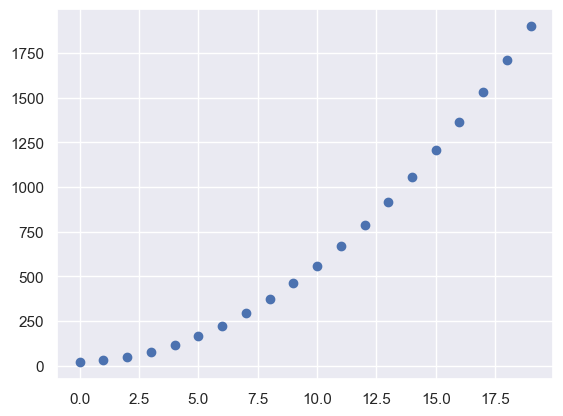

In [2]:
X = np.arange(0,20)
Y = 4*X + 5*(X**2) +20
plt.scatter(X,Y)

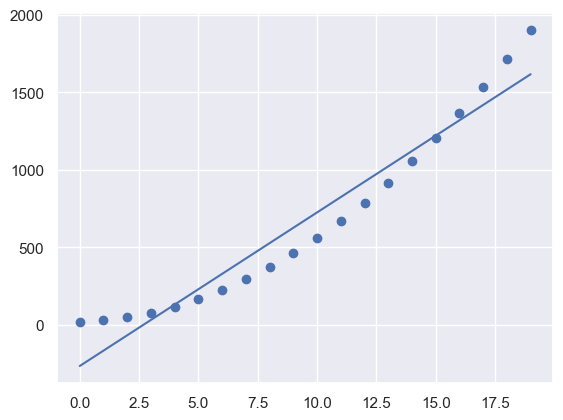

In [3]:
ml = LinearRegression()
ml.fit(X[:,np.newaxis],Y)
y_predict = ml.predict(X[:,np.newaxis])
plt.scatter(X,Y)
plt.plot(X,y_predict)

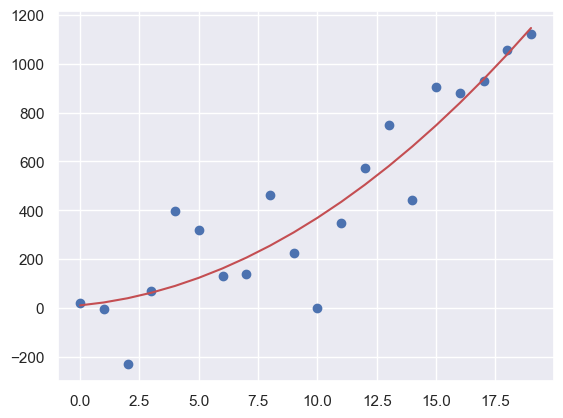

In [42]:
ml = LinearRegression()
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X[:,np.newaxis])
ml.fit(X_poly,Y)
y_predict = ml.predict(X_poly)
plt.scatter(X,Y)
plt.plot(X,y_predict,'r')

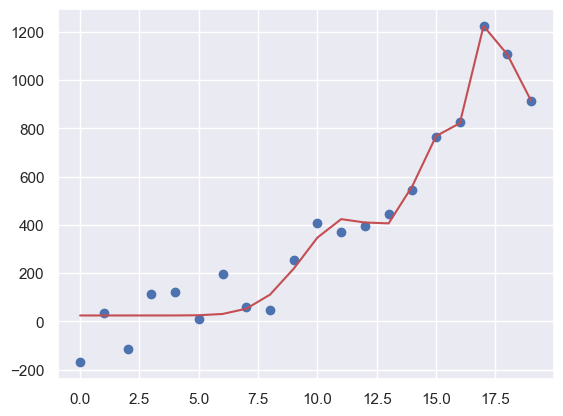

In [47]:
X = np.arange(20)
Y = 4*X + 3*(X**2) +150*np.random.randn(X.size)
ml = LinearRegression()
poly = PolynomialFeatures(degree=20)
X_poly = poly.fit_transform(X[:,np.newaxis])
ml.fit(X_poly,Y)
y_predict = ml.predict(X_poly)
plt.scatter(X,Y)
plt.plot(X,y_predict,'r')

C:\Users\davan\AppData\Local\Temp\ipykernel_11028\1495988060.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(g,shade=True)


<Axes: ylabel='Density'>

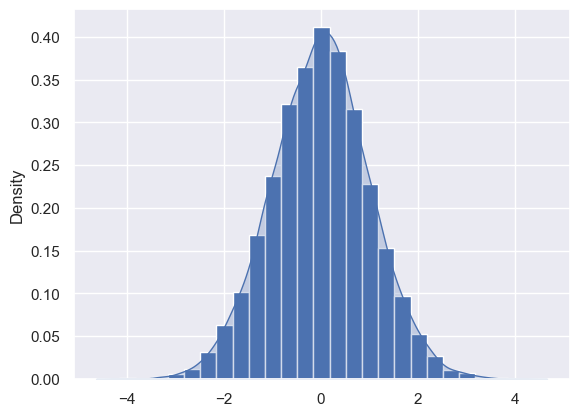

In [44]:
g = np.random.randn(10000)
plt.hist(g,bins=25,density=True)
sns.kdeplot(g,shade=True)

In [48]:
from sklearn.pipeline import make_pipeline


In [49]:
def fitting_pipline(degree=2,**kwargs):
    m = make_pipeline(PolynomialFeatures(degree=degree),LinearRegression(**kwargs))
    return m

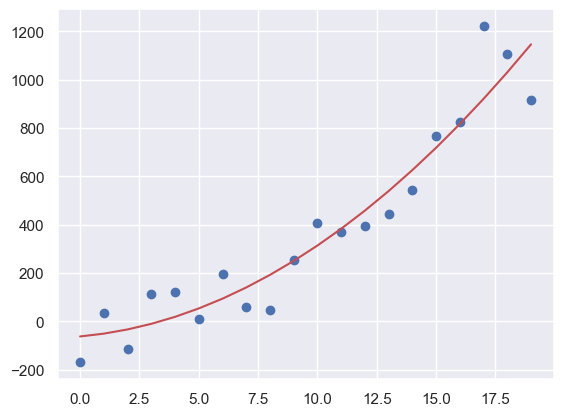

In [91]:
y_predict = fitting_pipline(2).fit(X[:,np.newaxis],Y).predict(X[:,np.newaxis])
plt.scatter(X,Y)
plt.plot(X,y_predict,'r')

In [74]:
from sklearn.model_selection import validation_curve


Text(0, 0.5, 'score')

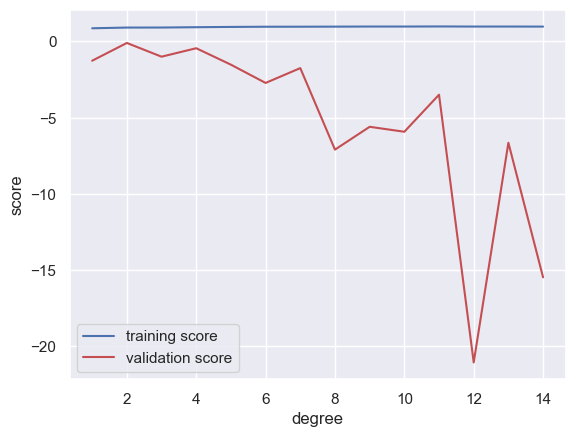

In [87]:
degree = np.arange(1,15)
train_score,val_score = validation_curve(fitting_pipline(),X[:,np.newaxis],Y,param_name='polynomialfeatures__degree',param_range=degree,cv=5)
plt.plot(degree,np.median(train_score,axis=1),'b',label='training score')
plt.plot(degree,np.median(val_score,axis=1),'r',label='validation score')
plt.legend(loc='best')
plt.xlabel('degree')
plt.ylabel('score')